<a href="https://colab.research.google.com/github/Rtengmiami/TimeSeries/blob/main/ARIMA_1_ipnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

In [4]:
df = pd.read_csv("/content/drive/MyDrive/NTUST/111-1/資料探勘 mon/期末報告/bitcoin_data.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.Timestamp = pd.to_datetime(df.Timestamp , unit = "s")
df.index = df.Timestamp
df= df.resample("W").mean()
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2012-01-01,4.611429,4.621429,4.611429,4.621429,16.702840,75.871357,4.615202
2012-01-08,6.009286,6.017321,6.009286,6.017321,6.219625,35.272736,6.012609
2012-01-15,6.847168,6.850636,6.840867,6.845145,2.308239,16.012406,6.846930
2012-01-22,6.332981,6.335673,6.329327,6.332019,7.036892,44.270967,6.332164
2012-01-29,6.124828,6.126207,6.124052,6.125431,3.389604,20.956109,6.125839


In [6]:
df.shape

(484, 7)

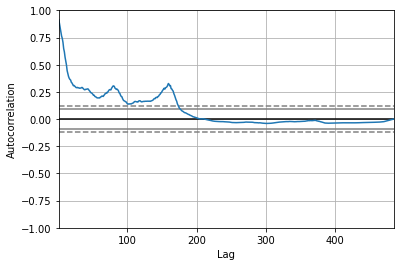

In [7]:
autocorrelation_plot(df)
plt.show()


In [8]:
df = df.reset_index()

In [9]:
df_for_prove = df.Weighted_Price
df_for_prove

0          4.615202
1          6.012609
2          6.846930
3          6.332164
4          6.125839
           ...     
479    48912.216044
480    56070.005951
481    57406.662459
482    54713.102551
483    57630.598391
Name: Weighted_Price, Length: 484, dtype: float64

In [10]:
split = "2020-01-01"
train_data = df[df['Timestamp'] <=split]
test_data =  df[df['Timestamp'] >split]
train_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2012-01-01,4.611429,4.621429,4.611429,4.621429,16.702840,75.871357,4.615202
1,2012-01-08,6.009286,6.017321,6.009286,6.017321,6.219625,35.272736,6.012609
2,2012-01-15,6.847168,6.850636,6.840867,6.845145,2.308239,16.012406,6.846930
3,2012-01-22,6.332981,6.335673,6.329327,6.332019,7.036892,44.270967,6.332164
4,2012-01-29,6.124828,6.126207,6.124052,6.125431,3.389604,20.956109,6.125839
...,...,...,...,...,...,...,...,...
413,2019-12-01,7355.340641,7360.972397,7349.737461,7355.226190,6.692576,48613.539479,7355.472402
414,2019-12-08,7379.551985,7383.959005,7375.480366,7379.547668,2.737669,20192.900208,7380.120877
415,2019-12-15,7232.351484,7235.530138,7228.947472,7232.250254,2.563430,18620.481650,7232.664836
416,2019-12-22,7037.059651,7041.362522,7033.078004,7037.068874,4.063312,28313.958170,7037.438063


In [11]:
train_data = train_data['Weighted_Price'].values
train_data_ARIMA = [x for x in train_data]
price2 = test_data['Weighted_Price'].values
test_data_ARIMA = [x for x in price2]
train_data

array([4.61520164e+00, 6.01260876e+00, 6.84693041e+00, 6.33216434e+00,
       6.12583936e+00, 5.95426024e+00, 5.75029891e+00, 4.80454507e+00,
       4.73119992e+00, 4.94736406e+00, 4.98747797e+00, 5.24546908e+00,
       4.91692884e+00, 4.82107967e+00, 4.91143810e+00, 4.88431627e+00,
       5.12400237e+00, 5.05760619e+00, 5.05365019e+00, 5.00497358e+00,
       4.99833451e+00, 5.06823601e+00, 5.12761452e+00, 5.39365845e+00,
       5.94713533e+00, 6.46180430e+00, 6.43488203e+00, 6.59599019e+00,
       7.20077942e+00, 8.42067054e+00, 8.65809769e+00, 9.84583434e+00,
       1.10530760e+01, 1.22394361e+01, 1.00293771e+01, 1.07703504e+01,
       1.06629025e+01, 1.11478254e+01, 1.20568074e+01, 1.20084313e+01,
       1.24596054e+01, 1.16787667e+01, 1.16316385e+01, 1.09494385e+01,
       1.07047029e+01, 1.06955703e+01, 1.10914005e+01, 1.17819820e+01,
       1.22537189e+01, 1.30291948e+01, 1.34091321e+01, 1.31806363e+01,
       1.31457884e+01, 1.31437191e+01, 1.35593249e+01, 1.47223709e+01,
      

In [12]:
len(test_data_ARIMA)

66

##平穩與否 及差分

<ipython-input-13-c6236eadb89b>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_for_prove, model="multiplicative", freq=12)


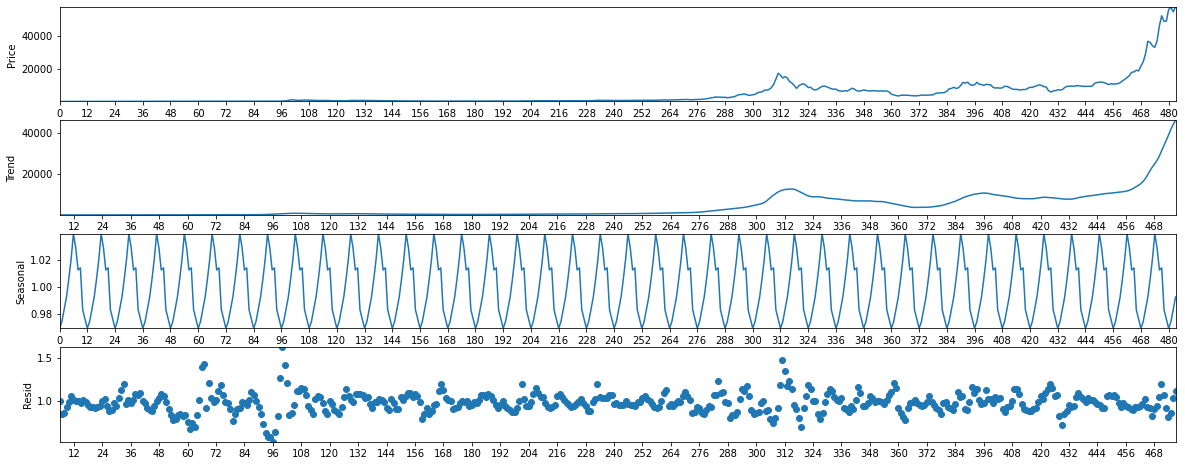

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_for_prove, model="multiplicative", freq=12)
plt.figure(figsize=(20,8))
plt.subplot(4,1,1)
plt.plot(result.observed, label="Copper Future")
plt.ylabel("Price")
plt.xticks(df.index[::12], rotation=0) #調整x軸刻度的呈現(每隔12個)
plt.margins(0)
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.ylabel("Trend")
plt.xticks(df.index[::12], rotation=0)
plt.margins(0)
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.ylabel("Seasonal")
plt.xticks(df.index[::12], rotation=0)
plt.margins(0)
plt.subplot(4,1,4)
plt.scatter(df.index,result.resid);
plt.ylabel("Resid")
plt.xticks(df.index[::12], rotation=0)
plt.margins(0) 

In [14]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test\n================================================")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index = [
        "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Criterical Value (%s)"%key] = value
    print(dfoutput)
    print("================================================")  
    #寫個自動判斷式
    if dfoutput[0] < dfoutput[4]:
        print("The data is stationary. (Criterical Value 1%)")  
    elif dfoutput[0] < dfoutput[5]:
        print("The data is stationary. (Criterical Value 5%)") 
    elif dfoutput[0] < dfoutput[6]:
        print("The data is stationary. (Criterical Value 10%)")
    else:
        print("The data is non-stationary, so do differencing!")
adf_test(df_for_prove)

Results of Dickey-Fuller Test
Test Statistic                   2.455084
p-value                          0.999034
#Lags Used                      10.000000
Number of Observations Used    473.000000
Criterical Value (1%)           -3.444251
Criterical Value (5%)           -2.867670
Criterical Value (10%)          -2.570035
dtype: float64
The data is non-stationary, so do differencing!


In [15]:
df_for_prove

0          4.615202
1          6.012609
2          6.846930
3          6.332164
4          6.125839
           ...     
479    48912.216044
480    56070.005951
481    57406.662459
482    54713.102551
483    57630.598391
Name: Weighted_Price, Length: 484, dtype: float64

In [16]:
diff_1 = df_for_prove - df_for_prove.shift(1) 
diff_1 = diff_1.dropna()
diff_1.head()
# diff_1.plot(figsize=(6,4), label="diff_1")
# plt.legend();

# adf_test(diff_1)
diff_1

1         1.397407
2         0.834322
3        -0.514766
4        -0.206325
5        -0.171579
          ...     
479      43.911826
480    7157.789906
481    1336.656509
482   -2693.559908
483    2917.495840
Name: Weighted_Price, Length: 483, dtype: float64

In [17]:
diff_2 = diff_1 - diff_1.shift(1) 
diff_2 = diff_2.dropna()
diff_2.head()
# diff_1.plot(figsize=(6,4), label="diff_1")
# plt.legend();

adf_test(diff_2)

Results of Dickey-Fuller Test
Test Statistic                -1.053331e+01
p-value                        9.034314e-19
#Lags Used                     1.000000e+01
Number of Observations Used    4.710000e+02
Criterical Value (1%)         -3.444310e+00
Criterical Value (5%)         -2.867696e+00
Criterical Value (10%)        -2.570049e+00
dtype: float64
The data is stationary. (Criterical Value 1%)


In [18]:
diff_2

2        -0.563085
3        -1.349088
4         0.308441
5         0.034746
6        -0.032382
          ...     
479    3448.542565
480    7113.878080
481   -5821.133398
482   -4030.216417
483    5611.055748
Name: Weighted_Price, Length: 482, dtype: float64

##ARIMA by day

In [19]:
from statsmodels.tsa.arima_model import ARIMA
price = df.Weighted_Price
X = price.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=6014.858687, expected=6452.980906
predicted=6793.058494, expected=6170.464326
predicted=5692.823004, expected=6579.044077
predicted=7156.426314, expected=6364.885298
predicted=6052.368814, expected=7199.797750
predicted=7898.915605, expected=8085.161630
predicted=8206.736229, expected=7550.410718
predicted=7330.159935, expected=6532.534210
predicted=6163.877557, expected=6343.862199
predicted=6189.603586, expected=6538.222757
predicted=6578.848346, expected=6998.302728
predicted=7398.666053, expected=6749.071136
predicted=6562.685070, expected=6392.495123
predicted=6351.761340, expected=6499.049447
predicted=6506.312671, expected=6543.406305
predicted=6524.862268, expected=6534.108503
predicted=6633.932723, expected=6364.901994
predicted=6263.714741, expected=6413.419856
predicted=6492.200909, expected=6405.273346
predicted=6357.412350, expected=6316.825316
predicted=6334.180032, expected=6406.511772
predicted=6476.548669, expected=5818.462442
predicted=5458.868586, expected=

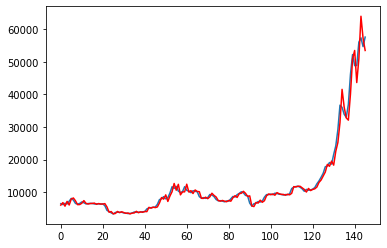

In [20]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 1567.136


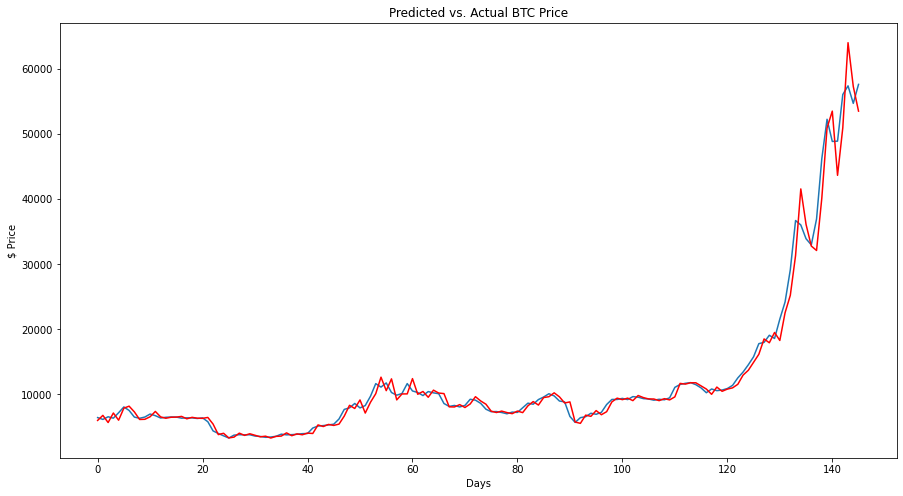

In [21]:
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Actual BTC Price')
plt.show()

##ARMIA

In [22]:
from statsmodels.tsa.arima_model import ARIMA
# method to be used later
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [23]:
datesX = df.index
weekly_in_year = 52
plotDates = datesX[418:len(df)]

# Next we will forecast with ARIMA 
differenced = difference(train_data_ARIMA, weekly_in_year)
model = ARIMA(differenced, order=(9, 2, 0))
model_fit = model.fit()
start_index = len(differenced)
end_index = start_index + len(test_data_ARIMA)-1
forecast = model_fit.predict(start=start_index, end=end_index)
history = [x for x in train_data_ARIMA]
week = 1
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat, weekly_in_year)
    print("Predicted week %d: %f" % (week, inverted))
    history.append(inverted)
    predicted_results.append(inverted)
    week += 1

# print(len(differenced),len(train_data_ARIMA))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicted week 1: 4005.593349
Predicted week 2: 3532.850381
Predicted week 3: 3740.812221
Predicted week 4: 3542.077235
Predicted week 5: 3178.284075
Predicted week 6: 3735.578005
Predicted week 7: 3546.200817
Predicted week 8: 3771.809537
Predicted week 9: 3798.544759
Predicted week 10: 3900.281313
Predicted week 11: 3859.411227
Predicted week 12: 4074.237489
Predicted week 13: 3977.879125
Predicted week 14: 4823.965425
Predicted week 15: 5142.628046
Predicted week 16: 5257.699415
Predicted week 17: 5299.274713
Predicted week 18: 5452.690529
Predicted week 19: 6213.947942
Predicted week 20: 7719.208668
Predicted week 21: 7943.047321
Predicted week 22: 8644.380733
Predicted week 23: 7929.565330
Predicted week 24: 8306.457660
Predicted week 25: 9726.196720
Predicted week 26: 11678.674636
Predicted week 27: 11131.969293
Predicted week 28: 11781.049087
Predicted week 29: 10295.247193
Predicted week 30: 9896.677318
Predicted week 31: 10152.796924
Predicted week 32: 11683.585925
Predicted w

In [24]:
def ARIMA_MSE(p,q,t):
  model = ARIMA(differenced, order=(p, q, t))
  model_fit = model.fit()
  start_index = len(differenced)
  end_index = start_index + len(test_data_ARIMA)-1
  forecast = model_fit.predict(start=start_index, end=end_index)
  history = [x for x in train_data_ARIMA]
  week = 1
  predicted_results = list()
  for yhat in forecast:
    inverted = inverse_difference(history, yhat, weekly_in_year)
    # print("Predicted week %d: %f" % (week, inverted))
    history.append(inverted)
    predicted_results.append(inverted)
    week += 1
  rmse = np.sqrt(mean_squared_error(test_data_ARIMA, predicted_results))
  print('Test RMSE:'f'{p,q,t} %.3f' % rmse)

In [25]:
def ARIMA_AIC(p,q,t):
  model = ARIMA(differenced, order=(p, q, t))
  model_fit = model.fit()
  start_index = len(differenced)
  end_index = start_index + len(test_data_ARIMA)-1
  forecast = model_fit.predict(start=start_index, end=end_index)
  history = [x for x in train_data_ARIMA]
  week = 1
  predicted_results = list()
  for yhat in forecast:
    inverted = inverse_difference(history, yhat, weekly_in_year)
    # print("Predicted week %d: %f" % (week, inverted))
    history.append(inverted)
    predicted_results.append(inverted)
    week += 1
  # rmse = np.sqrt(mean_squared_error(test_data_ARIMA, predicted_results))
  AIC =model_fit.aic
  print('Test AIC:'f'{p,q,t} %.3f' % AIC)


In [26]:
import warnings

warnings.filterwarnings("ignore")
for p in range(10):
  for q in range(1,3):
    for t in range(3):
      ARIMA_AIC(p,q,t)

Test AIC:(0, 1, 0) 5828.036
Test AIC:(0, 1, 1) 5765.878
Test AIC:(0, 1, 2) 5766.795
Test AIC:(0, 2, 0) 5885.831
Test AIC:(0, 2, 1) 5821.215
Test AIC:(0, 2, 2) 5758.282
Test AIC:(1, 1, 0) 5770.206
Test AIC:(1, 1, 1) 5766.744
Test AIC:(1, 1, 2) 5752.749
Test AIC:(1, 2, 0) 5867.539
Test AIC:(1, 2, 1) 5762.310
Test AIC:(1, 2, 2) 5759.030
Test AIC:(2, 1, 0) 5768.256
Test AIC:(2, 1, 1) 5768.697
Test AIC:(2, 1, 2) 5740.515
Test AIC:(2, 2, 0) 5829.792
Test AIC:(2, 2, 1) 5760.559
Test AIC:(2, 2, 2) 5764.484
Test AIC:(3, 1, 0) 5768.595
Test AIC:(3, 1, 1) 5767.742
Test AIC:(3, 1, 2) 5740.148
Test AIC:(3, 2, 0) 5825.616
Test AIC:(3, 2, 1) 5760.764
Test AIC:(3, 2, 2) 5760.089
Test AIC:(4, 1, 0) 5768.427
Test AIC:(4, 1, 1) 5763.972
Test AIC:(4, 1, 2) 5737.626
Test AIC:(4, 2, 0) 5819.604
Test AIC:(4, 2, 1) 5760.744
Test AIC:(4, 2, 2) 5756.068
Test AIC:(5, 1, 0) 5769.753
Test AIC:(5, 1, 1) 5752.164
Test AIC:(5, 1, 2) 5734.587
Test AIC:(5, 2, 0) 5785.052
Test AIC:(5, 2, 1) 5772.091
Test AIC:(5, 2, 2) 5

In [27]:
import statsmodels.api as sm

def ARIMA_MSE(p,q,t):
  model = sm.tsa.arima.ARIMA(differenced, order=(p, q, t))
  model_fit = model.fit()
  start_index = len(differenced)
  end_index = start_index + len(test_data_ARIMA)-1
  forecast = model_fit.predict(start=start_index, end=end_index)
  history = [x for x in train_data_ARIMA]
  week = 1
  predicted_results = list()
  for yhat in forecast:
    inverted = inverse_difference(history, yhat, weekly_in_year)
    # print("Predicted week %d: %f" % (week, inverted))
    history.append(inverted)
    predicted_results.append(inverted)
    week += 1
  rmse = np.sqrt(mean_squared_error(test_data_ARIMA, predicted_results))
  print('Test RMSE:'f'{p,q,t} %.3f' % rmse)
  return rmse

In [28]:
import warnings
mes_list = []
warnings.filterwarnings("ignore")
for p in range(20):
  for q in range(1,3):
    for t in range(3):
      c= ARIMA_MSE(p,q,t)
      mes_list.append(c)


Test RMSE:(0, 1, 0) 16689.015
Test RMSE:(0, 1, 1) 16525.947
Test RMSE:(0, 1, 2) 16513.371
Test RMSE:(0, 2, 0) 11914.189
Test RMSE:(0, 2, 1) 14838.822
Test RMSE:(0, 2, 2) 16224.248
Test RMSE:(1, 1, 0) 16583.272
Test RMSE:(1, 1, 1) 16515.946
Test RMSE:(1, 1, 2) 16513.034
Test RMSE:(1, 2, 0) 15575.233
Test RMSE:(1, 2, 1) 16288.667
Test RMSE:(1, 2, 2) 16213.842
Test RMSE:(2, 1, 0) 16523.929
Test RMSE:(2, 1, 1) 16519.282
Test RMSE:(2, 1, 2) 16511.365
Test RMSE:(2, 2, 0) 15546.240
Test RMSE:(2, 2, 1) 16222.918
Test RMSE:(2, 2, 2) 16218.200
Test RMSE:(3, 1, 0) 16516.823
Test RMSE:(3, 1, 1) 16522.117
Test RMSE:(3, 1, 2) 16384.043
Test RMSE:(3, 2, 0) 15152.393
Test RMSE:(3, 2, 1) 16217.448
Test RMSE:(3, 2, 2) 16310.025
Test RMSE:(4, 1, 0) 16545.140
Test RMSE:(4, 1, 1) 16549.714
Test RMSE:(4, 1, 2) 16390.185
Test RMSE:(4, 2, 0) 15061.114
Test RMSE:(4, 2, 1) 16244.072
Test RMSE:(4, 2, 2) 16281.913
Test RMSE:(5, 1, 0) 16556.137
Test RMSE:(5, 1, 1) 16569.569
Test RMSE:(5, 1, 2) 16563.789
Test RMSE:

In [29]:
min(mes_list)

11914.188542834914

In [30]:
import warnings
mes_list = []
warnings.filterwarnings("ignore")
for p in range(10):
  for q in range(1,3):
    for t in range(3):
      ARIMA_AIC(p,q,t)
      # mes_list.append(rmse)


Test AIC:(0, 1, 0) 5828.036
Test AIC:(0, 1, 1) 5765.878
Test AIC:(0, 1, 2) 5766.795
Test AIC:(0, 2, 0) 5885.831
Test AIC:(0, 2, 1) 5821.215
Test AIC:(0, 2, 2) 5758.282
Test AIC:(1, 1, 0) 5770.206
Test AIC:(1, 1, 1) 5766.744
Test AIC:(1, 1, 2) 5752.749
Test AIC:(1, 2, 0) 5867.539
Test AIC:(1, 2, 1) 5762.310
Test AIC:(1, 2, 2) 5759.030
Test AIC:(2, 1, 0) 5768.256
Test AIC:(2, 1, 1) 5768.697
Test AIC:(2, 1, 2) 5740.515
Test AIC:(2, 2, 0) 5829.792
Test AIC:(2, 2, 1) 5760.559
Test AIC:(2, 2, 2) 5764.484
Test AIC:(3, 1, 0) 5768.595
Test AIC:(3, 1, 1) 5767.742
Test AIC:(3, 1, 2) 5740.148
Test AIC:(3, 2, 0) 5825.616
Test AIC:(3, 2, 1) 5760.764
Test AIC:(3, 2, 2) 5760.089
Test AIC:(4, 1, 0) 5768.427
Test AIC:(4, 1, 1) 5763.972
Test AIC:(4, 1, 2) 5737.626
Test AIC:(4, 2, 0) 5819.604
Test AIC:(4, 2, 1) 5760.744
Test AIC:(4, 2, 2) 5756.068
Test AIC:(5, 1, 0) 5769.753
Test AIC:(5, 1, 1) 5752.164
Test AIC:(5, 1, 2) 5734.587
Test AIC:(5, 2, 0) 5785.052
Test AIC:(5, 2, 1) 5772.091
Test AIC:(5, 2, 2) 5

In [31]:
mes_list

[]

In [32]:
model = sm.tsa.arima.ARIMA(differenced, order=(0,2,0))
model_fit = model.fit()
start_index = len(differenced)
end_index = start_index + len(test_data_ARIMA)-1
forecast = model_fit.predict(start=start_index, end=end_index)
history = [x for x in train_data_ARIMA]
week = 1
predicted_results = list()
for yhat in forecast:
  inverted = inverse_difference(history, yhat, weekly_in_year)
  # print("Predicted week %d: %f" % (week, inverted))
  history.append(inverted)
  predicted_results.append(inverted)
  week += 1
rmse = np.sqrt(mean_squared_error(test_data_ARIMA, predicted_results))
print('Test RMSE:'f'{p,q,t} %.3f' % rmse)

Test RMSE:(9, 2, 2) 11914.189


In [33]:
print(len(df_for_prove),len(train_data_ARIMA),len(test_data_ARIMA),len(predicted_results))

484 418 66 66


In [34]:
rmse = np.sqrt(mean_squared_error(test_data_ARIMA, predicted_results))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 11914.189


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -2940.918
Date:                Mon, 26 Dec 2022   AIC                           5883.837
Time:                        09:02:43   BIC                           5887.734
Sample:                             0   HQIC                          5885.386
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.065e+05   1.52e+04     39.990      0.000    5.77e+05    6.36e+05
Ljung-Box (L1) (Q):                  19.89   Jarque-Bera (JB):              3589.52
Prob(Q):                              0.00   Pr

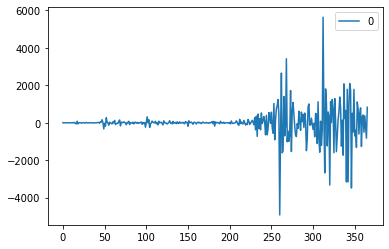

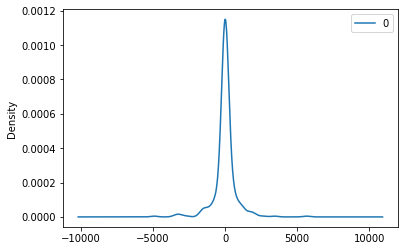

                 0
count   366.000000
mean      0.541391
std     779.870991
min   -4918.076408
25%     -49.013252
50%       2.026347
75%      76.993361
max    5637.668685


In [35]:
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

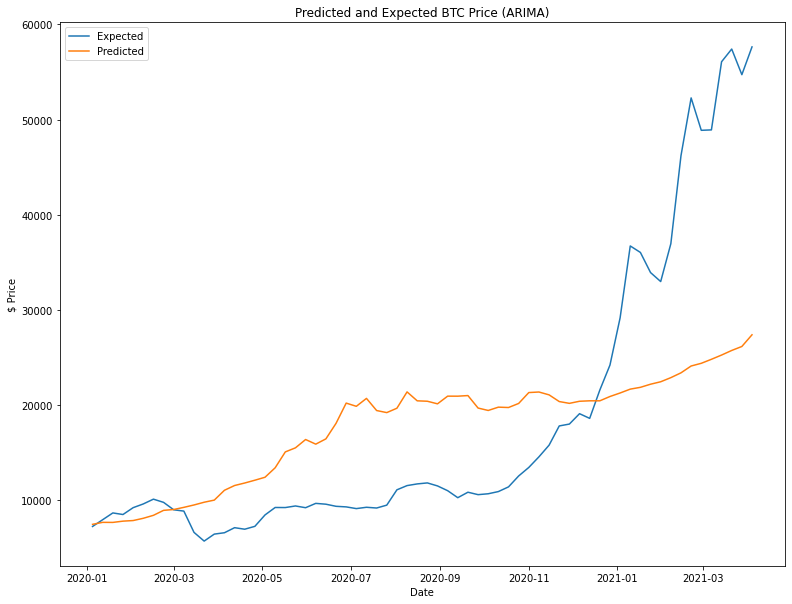

In [36]:
plt.figure(figsize=(13,10))
plt.plot(test_data.Timestamp, test_data_ARIMA, label='Expected')
plt.plot(test_data.Timestamp, predicted_results, label='Predicted')
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.title('Predicted and Expected BTC Price (ARIMA)')
plt.show()